In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
games_details= pd.read_csv('Data/games_details.csv')
games=pd.read_csv('Data/games.csv')
players=pd.read_csv('Data/players.csv')
ranking=pd.read_csv('Data/ranking.csv')
teams=pd.read_csv('Data/teams.csv')

C:\Users\Prince\AppData\Local\Temp\ipykernel_24808\4257920790.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details= pd.read_csv('Data/games_details.csv')


In [8]:
season_scoring=pd.read_csv('Output/season_scoring.csv')

In [9]:
season_scoring.head()

,SEASON,GAMES_PLAYED,TOTAL_POINTS,AVG_POINTS_PER_GAME,YOY_CHANGE
0,2003,1385,239196.0,186.000000,NaN
1,2004,1362,264210.0,193.986784,7.986784
2,2005,1432,277205.0,193.578911,-0.407874
3,2006,1419,279250.0,196.793517,3.214606
4,2007,1411,280539.0,198.822821,2.029304


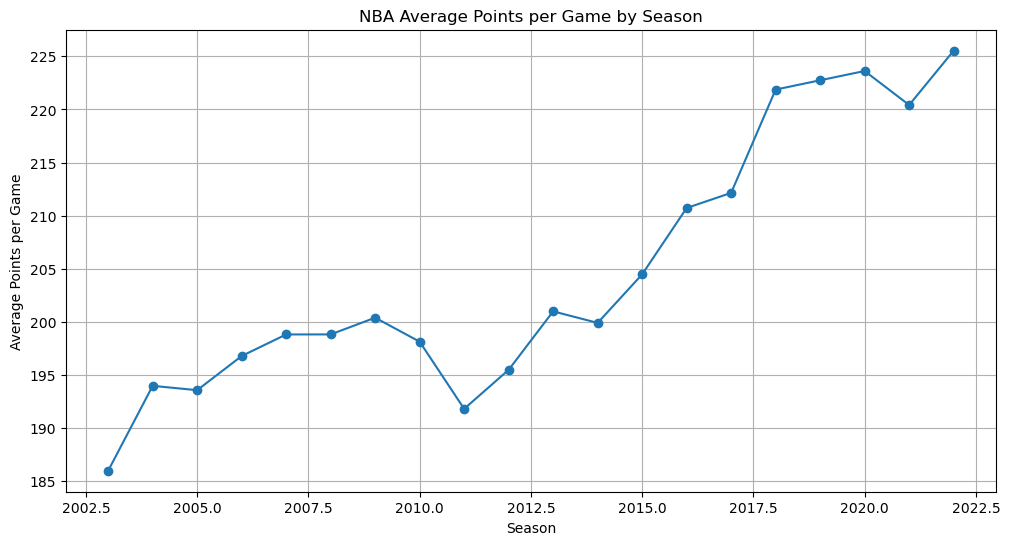

In [12]:
plt.figure(figsize=(12,6))
plt.plot(season_scoring['SEASON'],season_scoring['AVG_POINTS_PER_GAME'],marker='o')
plt.title('NBA Average Points per Game by Season')
plt.xlabel('Season')
plt.ylabel('Average Points per Game')
plt.grid(True)
plt.show()

In [13]:
team_season_scoring=pd.read_csv('Output/team_season_scoring.csv')

In [14]:
selected_teams=['Lakers', 'Celtics', 'Bulls', 'Warriors', 'Heat']

In [15]:
plot_df= team_season_scoring[team_season_scoring['NICKNAME'].isin(selected_teams)]

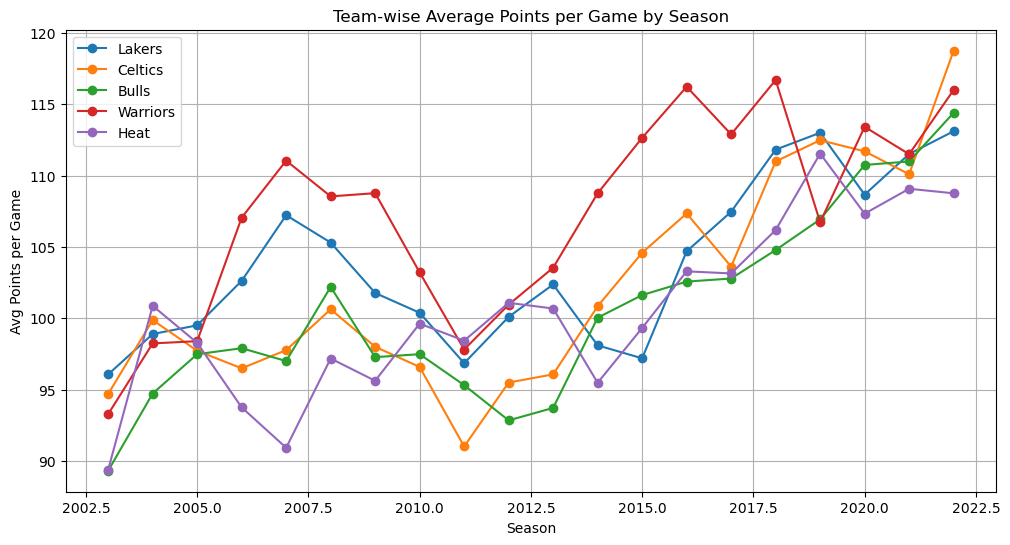

In [18]:
plt.figure(figsize=(12,6))
for team in selected_teams:
    team_data = plot_df[plot_df['NICKNAME']==team]
    plt.plot(
        team_data['SEASON'],
        team_data['AVG_POINTS_PER_GAME'],
        marker='o',
        label=team
    )

plt.title('Team-wise Average Points per Game by Season')
plt.xlabel('Season')
plt.ylabel('Avg Points per Game')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
home_away_season=pd.read_csv('Output/home_away_season.csv')

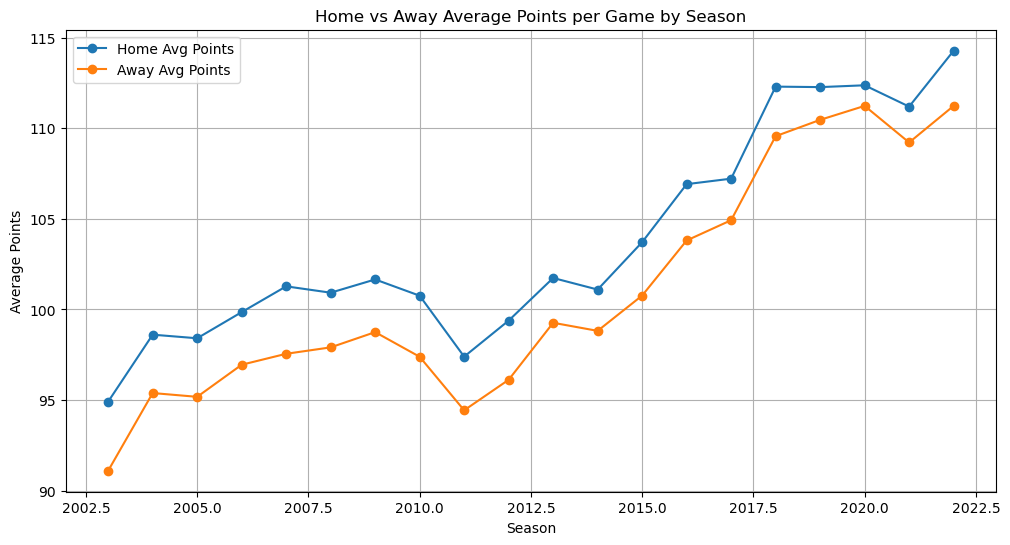

In [22]:
plt.figure(figsize=(12,6))
plt.plot(
    home_away_season['SEASON'],
    home_away_season['AVG_HOME_PTS'],
    marker='o',
    label='Home Avg Points'
)
plt.plot(
    home_away_season['SEASON'],
    home_away_season['AVG_AWAY_PTS'],
    marker='o',
    label='Away Avg Points'
)
plt.title('Home vs Away Average Points per Game by Season')
plt.xlabel('Season')
plt.ylabel('Average Points')
plt.legend()
plt.grid(True)
plt.show()

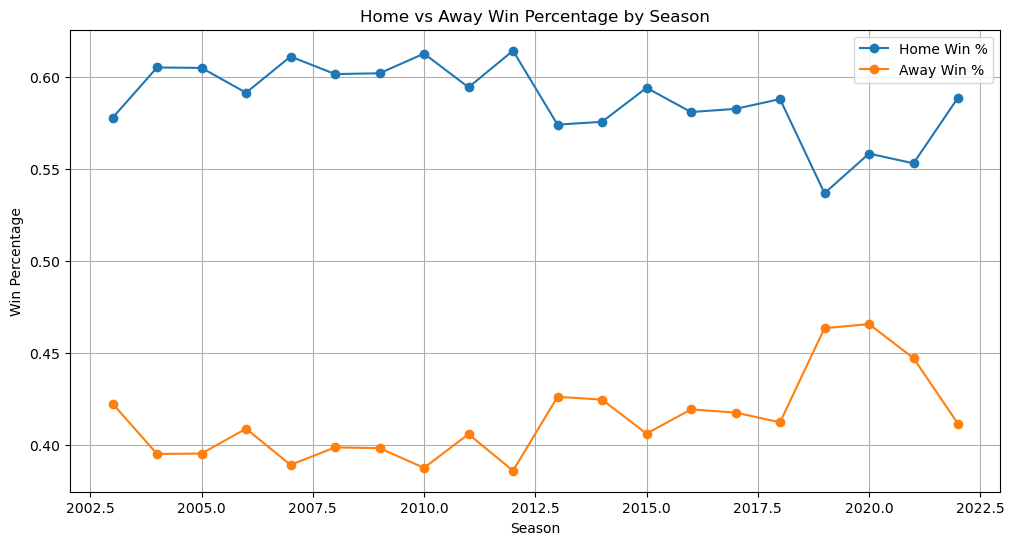

In [23]:
plt.figure(figsize=(12,6))
plt.plot(
    home_away_season['SEASON'],
    home_away_season['HOME_WIN_PCT'],
    marker='o',
    label='Home Win %'
)
plt.plot(
    home_away_season['SEASON'],
    home_away_season['AWAY_WIN_PCT'],
    marker='o',
    label='Away Win %'
)

plt.title('Home vs Away Win Percentage by Season')
plt.xlabel('Season')
plt.ylabel('Win Percentage')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
player_season_stats = pd.read_csv('Output/player_season_stats.csv')

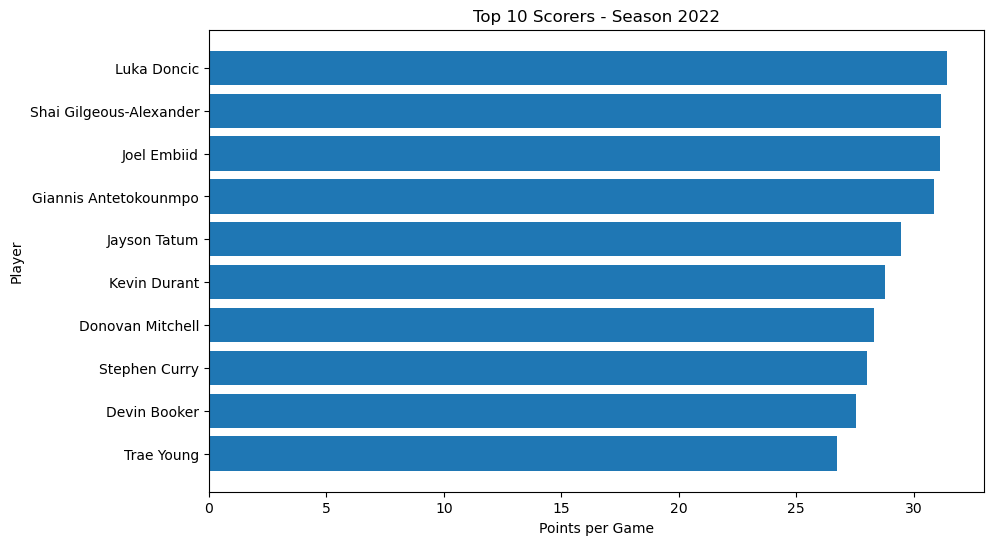

In [27]:
season = 2022

top_scorers = (
    player_season_stats[player_season_stats['SEASON'] == season]
    .sort_values('PTS_PER_GAME', ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
plt.barh(
    top_scorers['PLAYER_NAME'],
    top_scorers['PTS_PER_GAME']
)
plt.gca().invert_yaxis()
plt.title(f'Top 10 Scorers - Season {season}')
plt.xlabel('Points per Game')
plt.ylabel('Player')
plt.show()


In [29]:
consistent_players = (
    player_season_stats[player_season_stats['SEASON'] == season]
    .sort_values('GAMES_PLAYED', ascending=False)
    .head(10)
    .reset_index()
)

consistent_players[['PLAYER_NAME', 'GAMES_PLAYED']]


,PLAYER_NAME,GAMES_PLAYED
0,Jordan Clarkson,38
1,Nick Richards,37
2,Kevon Looney,37
3,Mason Plumlee,37
4,Jarred Vanderbilt,37
5,Jordan Poole,37
6,Jaylen Nowell,37
7,Daniel Gafford,37
8,Jalen McDaniels,37
9,Malik Beasley,37


In [36]:
conference_season_stats = pd.read_csv(
    'Output/conference_season_stats.csv'
)

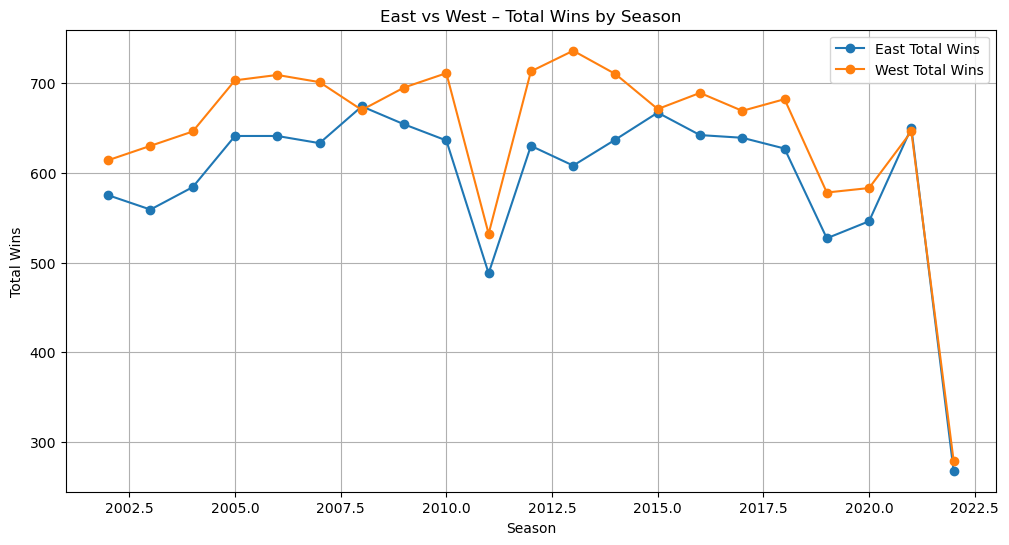

In [41]:
plt.figure(figsize=(12,6))

for conf in ['East', 'West']:
    conf_df = conference_season_stats[
        conference_season_stats['CONFERENCE'] == conf
    ].sort_values('SEASON_YEAR')

    plt.plot(
        conf_df['SEASON_YEAR'],
        conf_df['TOTAL_WINS'],
        marker='o',
        label=f'{conf} Total Wins'
    )

plt.title('East vs West – Total Wins by Season')
plt.xlabel('Season')
plt.ylabel('Total Wins')
plt.legend()
plt.grid(True)
plt.show()


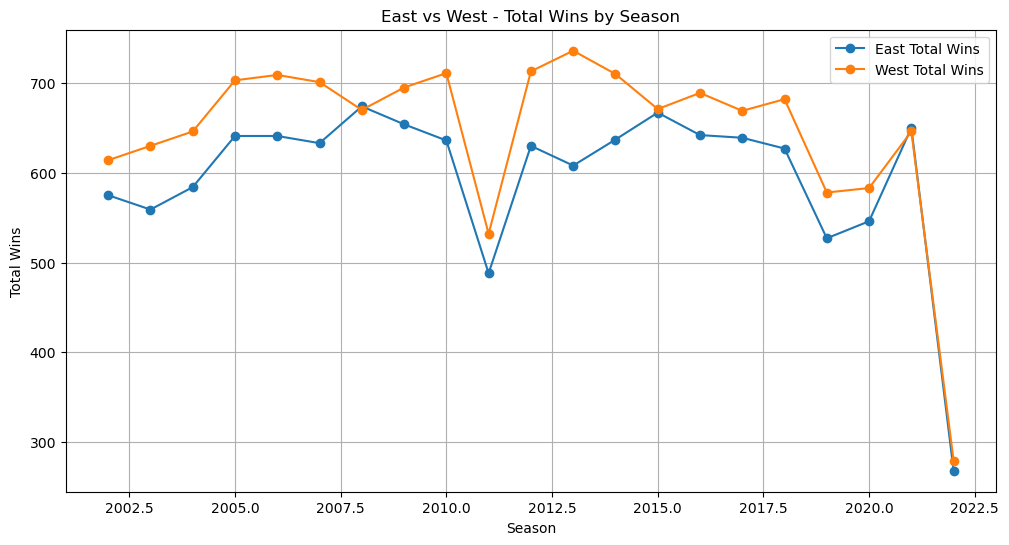

In [45]:
plt.figure(figsize=(12,6))

for conf in ['East', 'West']:
    df = conference_season_stats[
        conference_season_stats['CONFERENCE'] == conf
    ].sort_values('SEASON_YEAR')

    plt.plot(
        df['SEASON_YEAR'],
        df['TOTAL_WINS'],
        marker='o',
        label=f'{conf} Total Wins'
    )

plt.title('East vs West - Total Wins by Season')
plt.xlabel('Season')
plt.ylabel('Total Wins')
plt.legend()
plt.grid(True)
plt.show()
